## File parser - section 1
In this block, we will learn how to parse machine-written data files.
Such data is either stored in a human-readable ASCII format, or as non-readable binary format.

This first jupyter notebook contains a rather easy task, that is parsing a .CSV file. The data file keeps XRD (X-ray powder diffractometry) data with columns 1-3 representing beam angle 2theta, reflex intensity (baseline corrected) and reflex intensity (raw), respectively.

First, we need to import necessary modules. File-I/O operations are included in the python standard library, so we just need to import `matplotlib` for plotting purposes.
- import matplotlib

In [1]:
import matplotlib.pyplot as plt

Now we want to define the path to our file and read it's content into a variable
- open the file and read its content into the `fileString` variable
- print the content

In [2]:
filePath = 'Dolomite 4-HT (ELMO 477) cap 1 mm.ASC'

with open(filePath, 'r') as f:
	fileString = f.read()

print(fileString)

10.00906514 200 47.6646559931764
10.02206514 191.940321219209 47.5614364568587
10.03506514 207.519942101997 47.7063973110037
10.04806514 171.834551310946 47.3122123692926
10.06106514 259.935126216901 48.2159361607316
10.07406514 171.334761807252 47.2695104810579
10.08706514 179.582910781694 47.3379895619368
10.10006514 235.213938562157 47.9035152073336
10.11306514 183.967632483363 47.3469212178912
10.12606514 210.975832650176 47.6127045509154
10.13906514 192.375821013116 47.3983133527814
10.15206514 182.682147529036 47.2772346999813
10.16506514 217.020840449954 47.6204378336737
10.17806514 219.0664500503 47.6233366611778
10.19106514 205.6578920391 47.4637137443482
10.20406514 203.468631803771 47.4219922382311
10.21706514 258.885710797132 47.9842986039075
10.23006514 170.329740629321 47.0336839723819
10.24306514 208.472957551887 47.4187845754107
10.25606514 259.999586037199 47.940569925349
10.26906514 248.101138066251 47.7978062516375
10.28206514 222.1710431166 47.5071644406627
10.29506

Let's define a function, which is capable of parsing information from these file contents.
In order to achieve this, we need to facilitate a hand full of `string` operations.
An easy way to parse the values is to iterate over every row within the `fileString`.
This is possible through the `split()` method, which splits a string into a list of strings at a given argument. Using `\n` as argument, it splits the `fileString` at every linebreak.
Next, the content of an individual line needs to be split again. Since the data is separated by a "space", the right syntax is `split(' ')`.
Storing the data is possible through three `list`s, each of which is appended by one value per data row. Such `list`s can further be stored within an `dict`ionary for easy access later in the code.

- create a function `parseProtocol`, which takes `fileString` as input argument
- create a dictionary `DATA`, which contains 3 lists
- iterate over each row within `fileString` using `split('\n')`
- split the row itself using `split(' ')`
- append the 3 values to their respective lists
- return `DATA`

In [3]:
def parseProtocol(fileString):
	DATA = {
		0:[],
		1:[],
		2:[],
	}
	for row in fileString.split('\n'):
		print(row.split(' '))
		if len(row) == 0:
			continue
		val0, val1, val2 = row.split(' ')
		DATA[0].append(float(val0))
		DATA[1].append(float(val1))
		DATA[2].append(float(val2))

	return DATA
DATA = parseProtocol(fileString)

print(DATA)

['10.00906514', '200', '47.6646559931764']
['10.02206514', '191.940321219209', '47.5614364568587']
['10.03506514', '207.519942101997', '47.7063973110037']
['10.04806514', '171.834551310946', '47.3122123692926']
['10.06106514', '259.935126216901', '48.2159361607316']
['10.07406514', '171.334761807252', '47.2695104810579']
['10.08706514', '179.582910781694', '47.3379895619368']
['10.10006514', '235.213938562157', '47.9035152073336']
['10.11306514', '183.967632483363', '47.3469212178912']
['10.12606514', '210.975832650176', '47.6127045509154']
['10.13906514', '192.375821013116', '47.3983133527814']
['10.15206514', '182.682147529036', '47.2772346999813']
['10.16506514', '217.020840449954', '47.6204378336737']
['10.17806514', '219.0664500503', '47.6233366611778']
['10.19106514', '205.6578920391', '47.4637137443482']
['10.20406514', '203.468631803771', '47.4219922382311']
['10.21706514', '258.885710797132', '47.9842986039075']
['10.23006514', '170.329740629321', '47.0336839723819']
['10.2430

Plotting the data in intensity over 2theta, as generally done for XRD analyses, is a good control to see if your file parser works!
- plot the spectrum

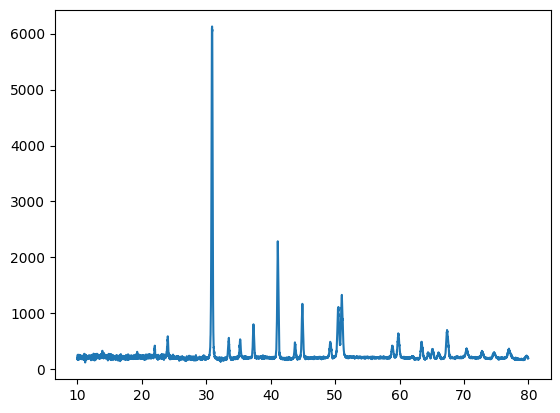

In [10]:
plt.plot(DATA[0], DATA[1])
plt.show()

The `pandas` module comes along with an inbuilt .csv parser.
Instead of writing a parser like seen above, using pandas you can easily parse .csv-like files using one function.
The data is then returned as `pandas.DataFrame()`
- import pandas
- use `pd.read_csv()` on `filePath`.
Please note, that you need to specify the value seperator (in our case space) with the `sep` argument

In [5]:
import pandas as pd
df = pd.read_csv(filePath,
                 names=[0,1,2],
                 sep=' '
                 )

Plotting the data should reveal the exact same pattern:

In [6]:
plt.plot(df[0], df[1])
plt.title('pandas')
plt.show()

Plot both the spectra obtained via different parser methods together in one plot, in order to check if they really yield the same pattern.



In [7]:
plt.plot(df[0], df[1])
plt.plot(DATA[0], DATA[1])
plt.show()

Barely visible...
Better subtract both intensities from each other to plot the difference and see, if datapoints within the resulting array deviate form 0

In [8]:
plt.plot(df[0], df[1]-DATA[1])
plt.show()